**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_full_cres = dat
print(dim(dat))
head(dat, 3)

[1] 87610   537


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "result.summary.fcc_peak_call.assayvote.gcfilter.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_fcc_vote = dat
print(dim(dat))
head(dat, 3)

[1] 175421      3


Region,Num_Assay,Type
<chr>,<dbl>,<chr>
chr1:115429-115969,1,Enhancer
chr1:184091-184563,1,Enhancer
chr1:605104-605675,1,Enhancer


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap_cluster = dat
print(dim(dat))
head(dat, 3)

[1] 87610     4


Region,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.176196,39
chr1:16025-16338,-12.15321,-12.879920,20
chr1:115429-115969,-11.02704,-3.031374,0


In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.tfmodule.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_tfmodule = dat
print(dim(dat))
head(dat, 3)

[1] 261836      6


Chrom,ChromStart,ChromEnd,Region,Group,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_02
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_05
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_10


In [6]:
tmp = dat_region_annot_tfmodule
tmp = tmp %>% dplyr::select(Region, Label)


dat = dat_region_umap_cluster
dat = dat %>% dplyr::left_join(tmp, by = "Region")

dat_merge = dat
print(dim(dat))
head(dat)

[1] 233616      5


Region,UMAP1,UMAP2,Cluster,Label
<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1:10038-10405,-21.87767,-9.176196,39,NA
chr1:16025-16338,-12.15321,-12.879920,20,NA
chr1:115429-115969,-11.02704,-3.031374,0,Module_02
chr1:115429-115969,-11.02704,-3.031374,0,Module_05
chr1:115429-115969,-11.02704,-3.031374,0,Module_10
chr1:115429-115969,-11.02704,-3.031374,0,Module_44


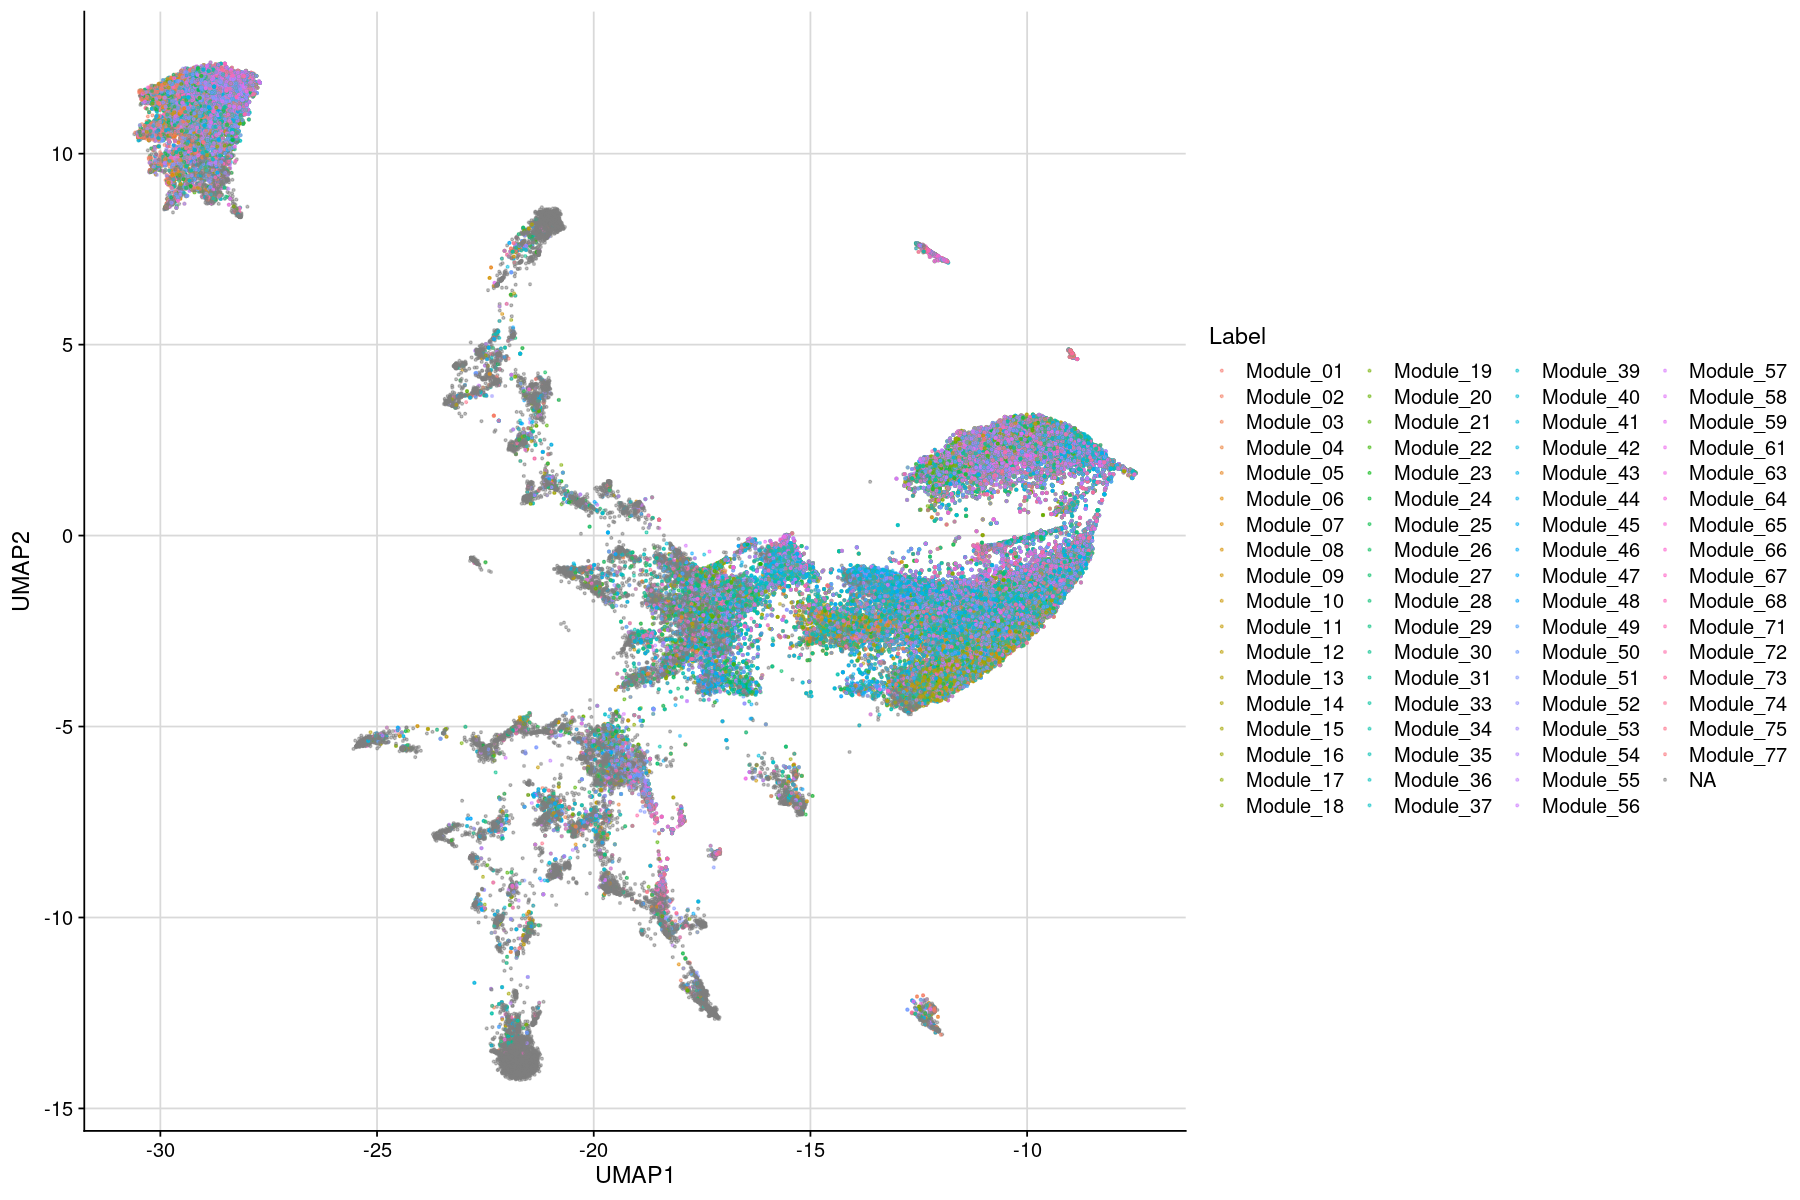

In [8]:
gpt = ggplot(dat_merge, aes(x = UMAP1, y = UMAP2, color = Label)) +
    geom_point(size = 0.5, alpha = 0.5) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 15)
print(gpt)

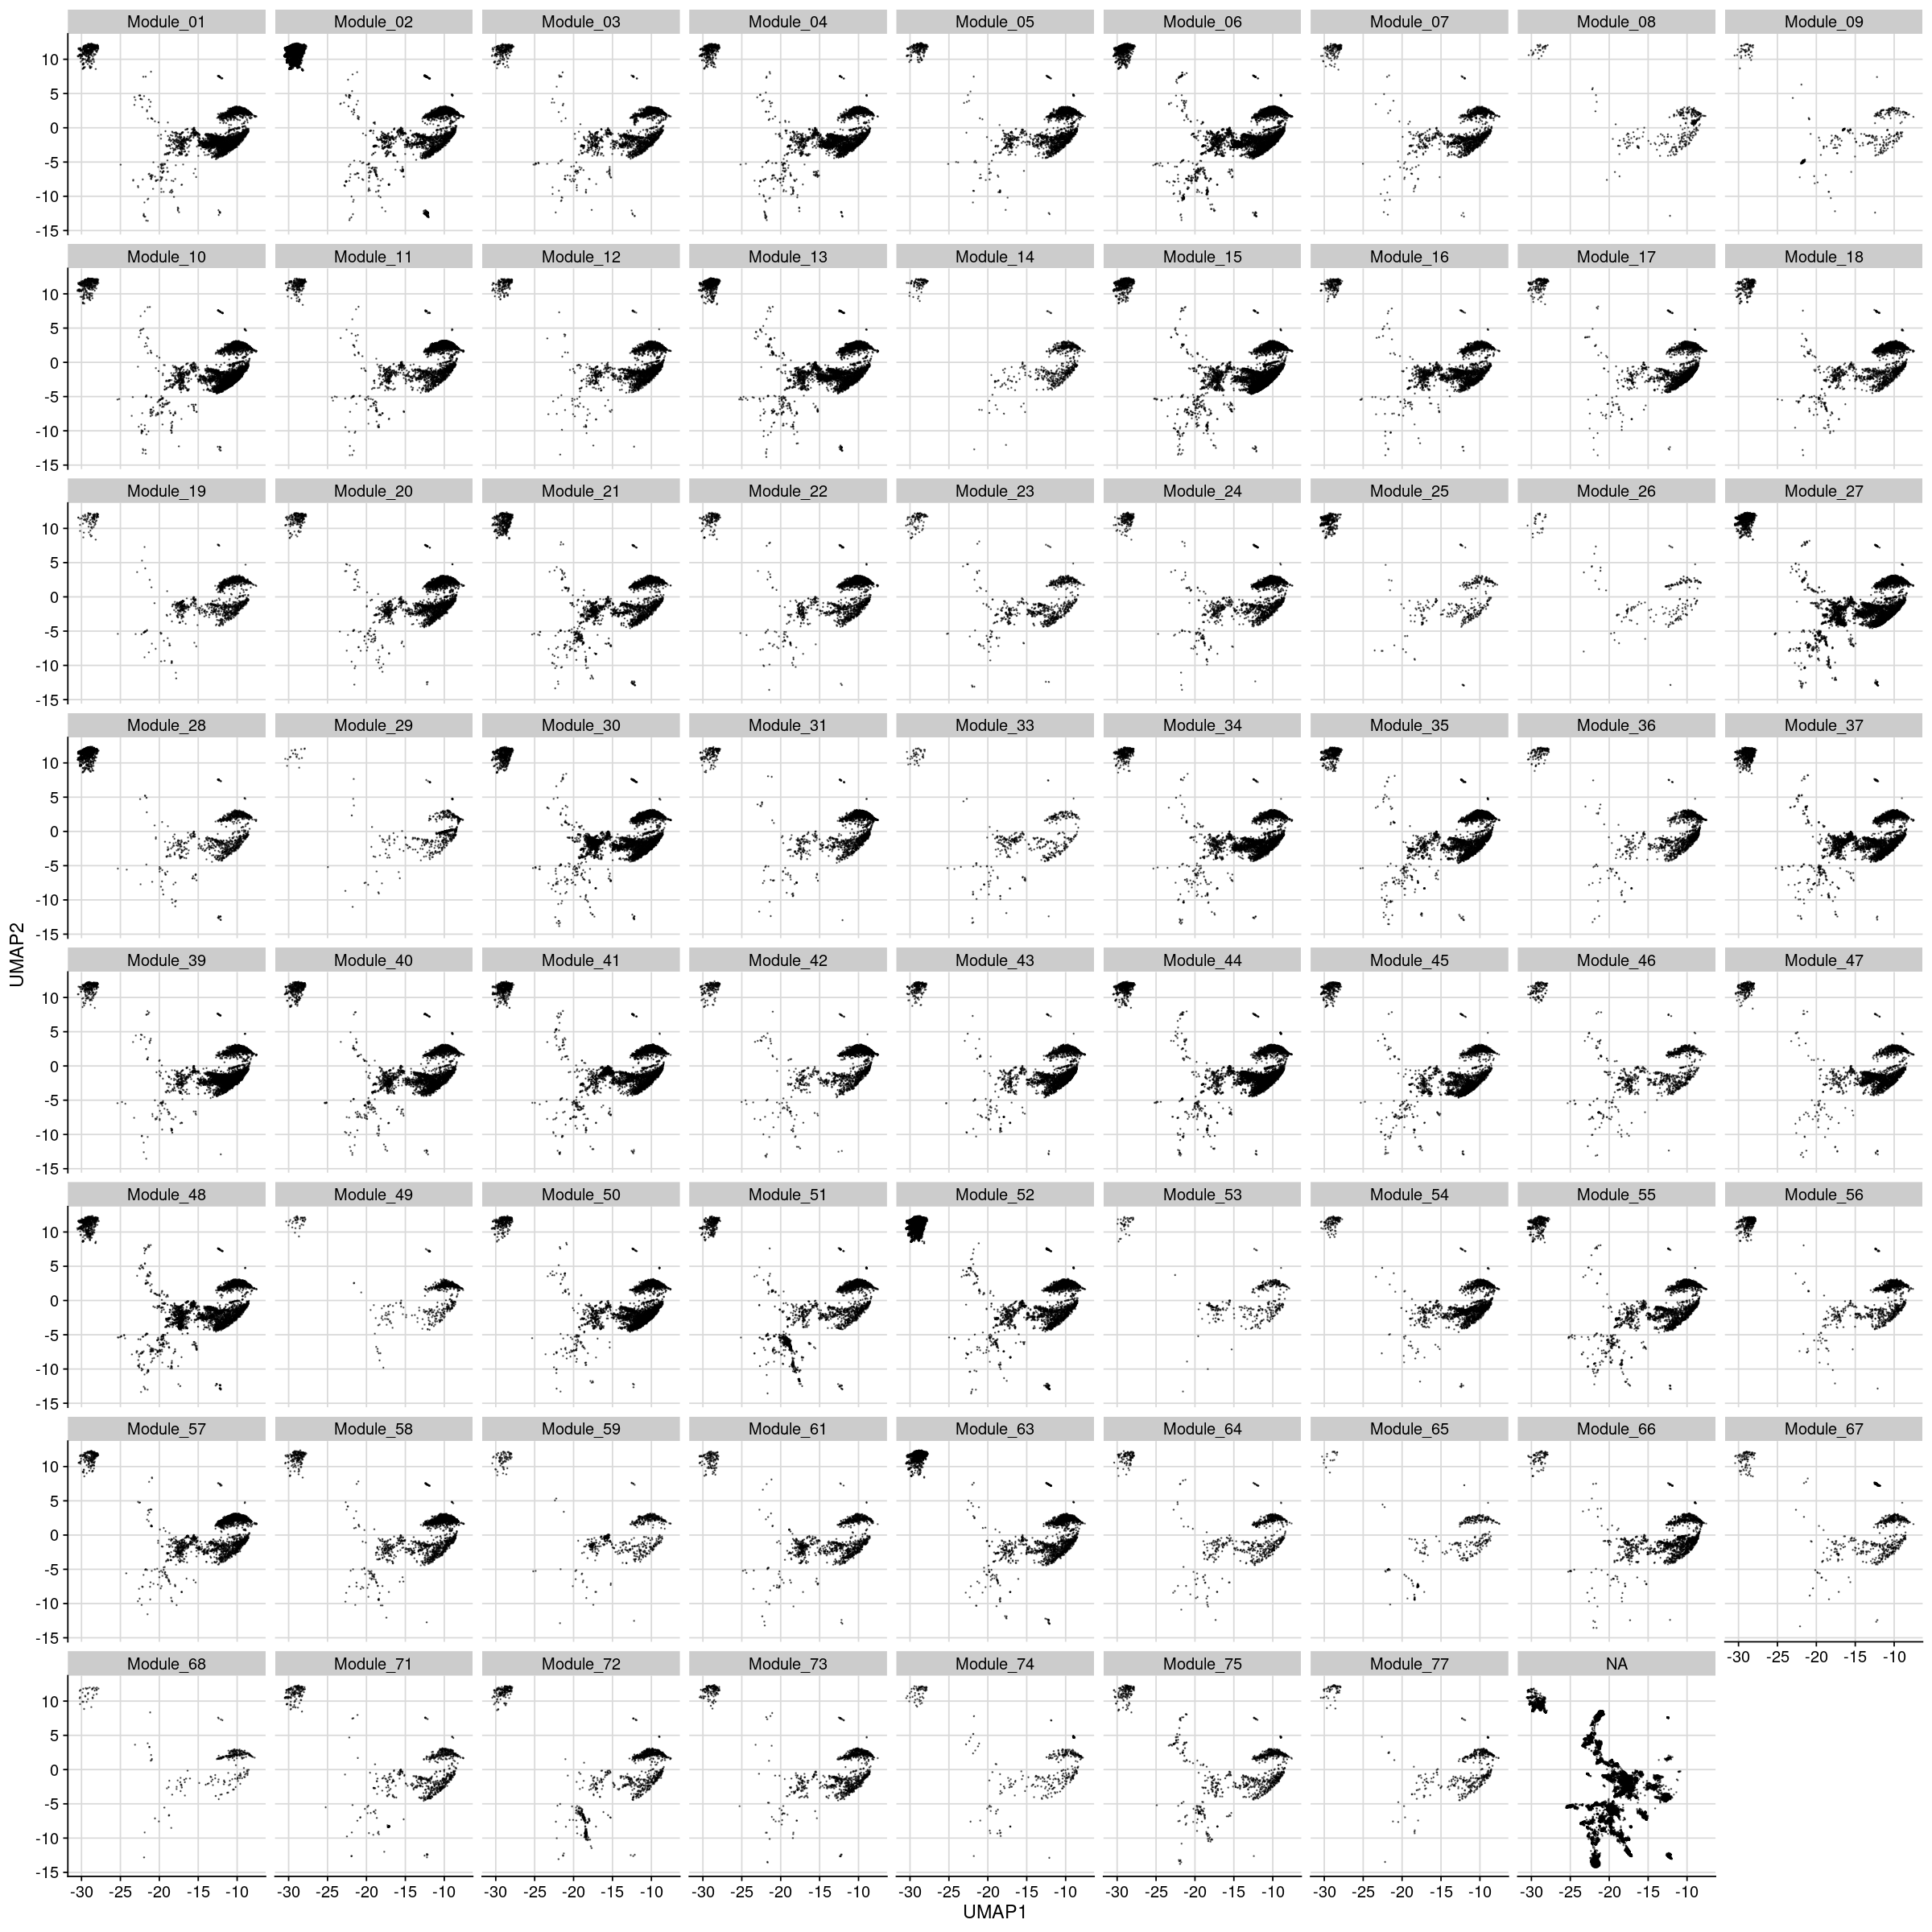

In [11]:
gpt = ggplot(dat_merge, aes(x = UMAP1, y = UMAP2)) +
    geom_point(size = 0.1, alpha = 0.5) +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Label)

options(repr.plot.height = 20, repr.plot.width = 20)
print(gpt)